In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Linear Regression:-
    
    h(x) = p0 + p1*x
    
    where p0,p1 are parameters and x is input

In [317]:
X = pd.read_csv('train.csv')

In [318]:
X.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [319]:
X.shape

(700, 2)

In [320]:
# drop NaN values from dataframe
X = X.dropna()

In [321]:
X.shape

(699, 2)

In [322]:
x = X['x'].to_numpy()
y = X['y'].to_numpy()

In [323]:
n = len(x)
n

699

In [251]:
# mean square error
def mse(m,n):
    return ((m-n)**2).mean()

In [324]:
# computes gradient of parameter p0
def grad_p0(pred,actual):
    p0_grad = (pred-actual).mean()
    return p0_grad

In [325]:
# computes gradient of parameter p1
def grad_p1(pred,actual,inp):
    p1_grad = ((pred-actual)*inp).mean()
    return p1_grad

In [353]:
class Dataset:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __getitem__(self,i):
        return self.x[i],self.y[i]
    def __len__(self):
        return len(x)

In [362]:
class DataLoader:
    def __init__(self,ds,bs):
        self.ds = ds
        self.bs = bs
    def __iter__(self):
        for i in range(0,len(self.ds),self.bs):
            yield self.ds[i:i+self.bs]

In [401]:
ds = Dataset(x,y)

In [402]:
dl = DataLoader(dataset,bs = 64) # bs - batch size

In [406]:
epochs = 5

# learning rate
lr=1e-4

# initialize parameters with random values
p0=0
p1=1

In [407]:
for epoch in range(epochs):
    total_loss = 0
    iterations = 0
    for batch_x,batch_y in dl:
        preds = p0 + p1*batch_x
        loss = mse(preds,batch_y)
        total_loss += loss*len(batch_x)
        iterations += len(batch_x)
        p0 = p0-lr*grad_p0(preds,batch_y)
        p1 = p1-lr*grad_p1(preds,batch_y,batch_x)
    print('Epoch ',epoch+1,' loss:-',total_loss/iterations)

Epoch  1  loss:- 7.911615346184518
Epoch  2  loss:- 7.908905334032018
Epoch  3  loss:- 7.908879094568126
Epoch  4  loss:- 7.90887756665082
Epoch  5  loss:- 7.908876312932231


In [408]:
# updated parameters i.e., fine tuned by backpropagation

print('p0',p0)
print('p1',p1)

p0 -0.0001441098624211165
p1 0.9990720744455295


In [423]:
# test data
X_test = pd.read_csv('test.csv')

In [424]:
X_test.shape

(300, 2)

In [425]:
X_test = X_test.dropna()

In [426]:
X_test.shape

(300, 2)

In [427]:
test_x = X_test['x']
test_y = X_test['y']

In [428]:
test_dataset = Dataset(test_x,test_y)

In [429]:
test_dl = DataLoader(test_dataset,bs = 64)

In [452]:
# predicitons
predictions = []
for batch_x,_ in test_dl:
    predictions.append(p0+p1*batch_x)

predictions = np.concatenate(predictions)

In [453]:
# RMSE - Root Mean Square Error of predictions
np.sqrt(mse(predictions,test_y))

3.074519101454234

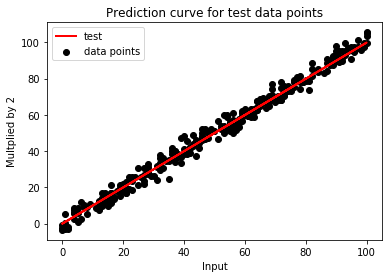

In [454]:
# plot of test data points
plt.scatter(X_test['x'],X_test['y'],color='k',label='data points')
plt.plot(test_x,predictions,'r',label='test',linewidth=2)

plt.title('Prediction curve for test data points')
plt.xlabel('Input')
plt.ylabel('Multplied by 2')

plt.legend()

plt.grid(False)

plt.show()